### Student Information
Name: 許承恩

Student ID: 112065519

GitHub ID: theirenehsu

Kaggle name: theirenehsu

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

## Table of Contents
1. Part 1 - Lab Exercises

2. Part 2 - Kaggle Competition

3. Part 3 - Competition Report
        

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__. 

# Part 1

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [1]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [2]:
# Answer here
import nltk
import numpy as np
import helpers.data_mining_helpers as dmh
import plotly.express as plot_ex
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

# Top 30 words in train dataset
train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(train_df.text) #learn the vocabulary and return document-term matrix
print(train_counts.shape)

term_frequencies = []
for j in range(0, train_counts.shape[1]):
    term_frequencies.append(sum(train_counts[:,j].toarray()))

term_frequencies = np.asarray(train_counts.sum(axis=0))[0]

sorted_terms = [term for _, term in sorted(zip(term_frequencies, count_vect.get_feature_names_out()), reverse=True)]
sorted_frequencies = sorted(term_frequencies, reverse=True)

filtered_data = {
    'Terms': sorted_terms[0:30],
    'Frequencies': sorted_frequencies[0:30]
}
df_filtered = pd.DataFrame(filtered_data)

fig = plot_ex.bar(df_filtered, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

[nltk_data] Downloading package punkt to /Users/irenehsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(3613, 10115)


In [3]:
# Top 30 words in test dataset
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
test_counts = count_vect.fit_transform(test_df.text) #learn the vocabulary and return document-term matrix
print(test_counts.shape)

term_frequencies = []
for j in range(0, test_counts.shape[1]):
    term_frequencies.append(sum(test_counts[:,j].toarray()))

term_frequencies = np.asarray(test_counts.sum(axis=0))[0]

sorted_terms = [term for _, term in sorted(zip(term_frequencies, count_vect.get_feature_names_out()), reverse=True)]
sorted_frequencies = sorted(term_frequencies, reverse=True)

filtered_data = {
    'Terms': sorted_terms[0:30],
    'Frequencies': sorted_frequencies[0:30]
}
df_filtered = pd.DataFrame(filtered_data)

fig = plot_ex.bar(df_filtered, x='Terms', y='Frequencies')
fig.update_xaxes(tickangle=90)

fig.show()

(347, 1949)


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [5]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# build analyzers
tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
tfidf_1000.fit(train_df['text'])

train_data_tfidf_features_1000 = tfidf_1000.transform(train_df['text'])

## check dimension
train_data_tfidf_features_1000.shape
train_data_tfidf_features_1000.toarray()

feature_names_1000 = tfidf_1000.get_feature_names_out()
feature_names_1000[100:110]

array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

### Answer here
Each entry [i, j] in the confusion matrix represents the instances of true class i being predicted as class j.

The number 57 in the [0, 0] position of the confusion matrix above indicates that the times of true label is anger, and the predicted label is also anger. 

The number 16 in the [1, 0] position of the confusion matrix above indicates that the times of true label is fear, but the prediction is anger.

The number 6 in the [2, 0] position of the confusion matrix above indicates that the times of true label is joy, but the prediction is anger.

The number 7 in the [3, 0] position of the confusion matrix above indicates that the times of true label is sadness, but the prediction is anger.

Similarly, the numbers in other positions follow the same logic.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [6]:
import nltk
nltk.download('punkt')

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

[nltk_data] Downloading package punkt to /Users/irenehsu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x12f633b00>)

In [7]:
# Answer here
from sklearn.naive_bayes import MultinomialNB

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

y_test_pred[:10]

array(['joy', 'fear', 'anger', 'sadness', 'sadness', 'joy', 'joy', 'fear',
       'sadness', 'sadness'], dtype='<U7')

In [8]:
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

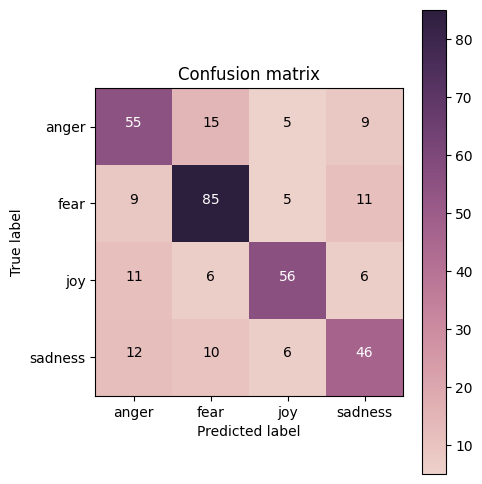

In [12]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer here
The Decision Tree model has a significantly higher training accuracy compared to the Naive Bayes model. This suggests that the Decision Tree model fits the training data better, capturing more intricate patterns and details present in the training set.

The Decision Tree model's high training accuracy might be a result of overfitting, where it captures noise and specificities in the training data that do not generalize well to new data. This is reflected in the lower testing accuracy.

The Naive Bayes model performs slightly better in terms of testing accuracy. This indicates that, despite the Decision Tree model's superior fit to the training data, it may not generalize as well to new, unseen data as the Naive Bayes model does.

The Naive Bayes model, being a simpler probabilistic model, may generalize better to new data, leading to a slightly better testing accuracy despite a lower training accuracy.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

In [13]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.371713,1.329149,0.400576,1.293040
1,1,0.649045,0.969612,0.682997,0.909551
2,2,0.807639,0.570258,0.697406,0.829017
3,3,0.846111,0.413477,0.708934,0.782276
4,4,0.877387,0.331953,0.682997,0.830274
5,5,0.911431,0.268723,0.688761,0.839400
6,6,0.922225,0.225805,0.682997,0.896804
7,7,0.938002,0.192736,0.680115,0.943662
8,8,0.948796,0.157618,0.682997,1.000171
9,9,0.956269,0.141744,0.671470,1.074599


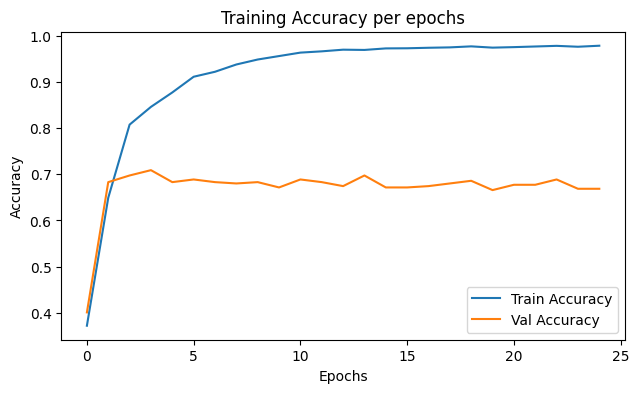

In [14]:
# Training and Validation Accuracy

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy per epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

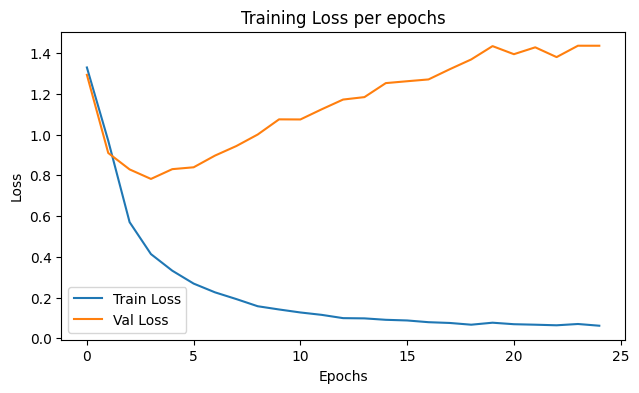

In [15]:
# Training and Validation Loss

plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.plot(training_log['epoch'], training_log['loss'], label='Train Loss')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val Loss')
plt.title('Training Loss per epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### Answer here
To generate a specific vector to represent the sequence of words (sentence), we can use the following methods:

1.  Average Pooling:

- Calculate the average of all word vectors in the sentence.

- This is done by summing up all the word vectors and dividing by the number of words in the sentence.

2.  Sum Pooling:

- Similar to average pooling, but you take the sum of all word vectors instead of the average.

3.  TF-IDF Weighted Average:

- Weigh each word vector by its TF-IDF score before averaging.

- This can help give more importance to words that are more informative in the context of the entire dataset.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [17]:
# Answer here
from sklearn.manifold import TSNE
from gensim.models import KeyedVectors

model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)


load ok
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irrita

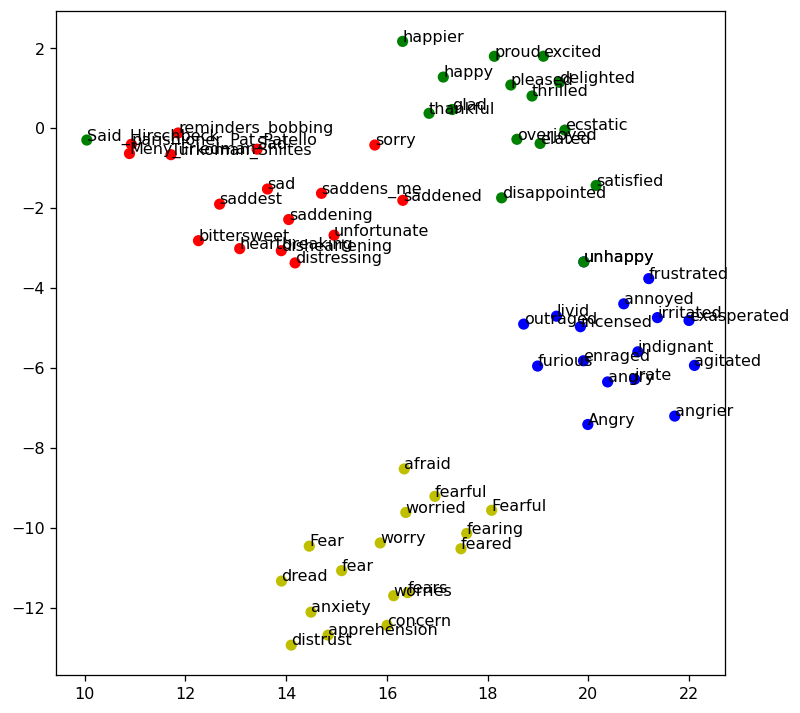

In [18]:
## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part 3

## Data Preparation

In [1]:
import pandas as pd
import json

In [33]:
# read CSV file
csv1 = pd.read_csv('Kaggle Competition/emotion.csv')
csv2 = pd.read_csv('Kaggle Competition/data_identification.csv')

# merge CSV files
csv_data= pd.merge(csv1, csv2, on='tweet_id', how='outer')
csv_data.head(10)

,tweet_id,emotion,identification
0,0x3140b1,sadness,train
1,0x368b73,disgust,train
2,0x296183,anticipation,train
3,0x2bd6e1,joy,train
4,0x2ee1dd,anticipation,train
5,0x34cd80,joy,train
6,0x33f099,sadness,train
7,0x2ae7b7,sadness,train
8,0x2408d4,trust,train
9,0x2b193b,sadness,train


In [34]:
# read JSON file
data = []
with open('Kaggle Competition/tweets_DM.json', 'r', encoding='utf-8') as file:
    for line in file:
        record = json.loads(line)
        data.append(record)

# extract columns in JSON file
extracted_data = []
for record in data:
    score = record["_score"]
    tweet_info = record["_source"]["tweet"]
    tweet_id = tweet_info["tweet_id"]
    hashtags = tweet_info["hashtags"]
    text = tweet_info["text"]
    crawled_date = record["_crawldate"]
    
    # store data into a dictionary
    extracted_data.append({
        "tweet_id": tweet_id,
        "hashtags": hashtags,
        "text": text,
        "score": score,
        "crawled_date": crawled_date
    })

# convert dictionary to dataframe
json_data = pd.DataFrame(extracted_data)
json_data.head(10)

,tweet_id,hashtags,text,score,crawled_date
0,0x376b20,[Snapchat],"People who post ""add me on #Snapchat"" must be ...",391,2015-05-23 11:42:47
1,0x2d5350,"[freepress, TrumpLegacy, CNN]","@brianklaas As we see, Trump is dangerous to #...",433,2016-01-28 04:52:09
2,0x28b412,[bibleverse],"Confident of your obedience, I write to you, k...",232,2017-12-25 04:39:20
3,0x1cd5b0,[],Now ISSA is stalking Tasha 😂😂😂 <LH>,376,2016-01-24 23:53:05
4,0x2de201,[],"""Trust is not the same as faith. A friend is s...",989,2016-01-08 17:18:59
5,0x1d755c,"[authentic, LaughOutLoud]",@RISKshow @TheKevinAllison Thx for the BEST TI...,120,2015-06-11 04:44:05
6,0x2c91a8,[],Still waiting on those supplies Liscus. <LH>,1021,2015-08-18 02:30:07
7,0x368e95,[],Love knows no gender. 😢😭 <LH>,481,2015-08-20 14:31:27
8,0x249c0c,[LeagueCup],@DStvNgCare @DStvNg More highlights are being ...,827,2016-04-18 13:01:02
9,0x218443,"[materialism, money, possessions]",When do you have enough ? When are you satisfi...,66,2015-09-09 09:22:55


In [35]:
# merge all data
all_data= pd.merge(csv_data, json_data, on='tweet_id', how='outer')
all_data.head(10)

,tweet_id,emotion,identification,hashtags,text,score,crawled_date
0,0x3140b1,sadness,train,[],Why Chester? <LH> <LH>,105,2017-07-09 20:48:41
1,0x368b73,disgust,train,[],@JaredLeto you are the fish that Jonah. Excep...,797,2015-08-09 06:58:43
2,0x296183,anticipation,train,[pouroutyourspirit],He is coming back again and gonna come again q...,586,2017-11-02 01:44:41
3,0x2bd6e1,joy,train,[],Dei is really such a beautiful person inside &...,780,2015-03-11 18:40:46
4,0x2ee1dd,anticipation,train,[],Expressive praise is also an expression of fai...,329,2017-05-04 03:51:25
5,0x34cd80,joy,train,"[weather, LosAngeles, itsthelittlethings]",This #weather 💖 <LH> #LosAngeles #itsthelittle...,845,2015-02-25 06:40:17
6,0x33f099,sadness,train,[],@Impeach_D_Trump @realDonaldTrump These people...,262,2017-02-18 23:51:08
7,0x2ae7b7,sadness,train,[ugh],@BAMBl_twt mine too #ugh <LH>,254,2016-10-24 12:26:21
8,0x2408d4,trust,train,[grateful],"I have such an amazing mum, who for 3 wks has ...",733,2017-03-01 08:25:48
9,0x2b193b,sadness,train,[POTUS],@SPECNewsROC Looks like Tillerson is stuck sen...,591,2017-11-16 09:45:31


In [36]:
# change the data type of the 'hashtags' column to non-list
all_data['hashtags'] = all_data['hashtags'].apply(lambda x: ', '.join(map(str, x)))
all_data.head(10)

,tweet_id,emotion,identification,hashtags,text,score,crawled_date
0,0x3140b1,sadness,train,,Why Chester? <LH> <LH>,105,2017-07-09 20:48:41
1,0x368b73,disgust,train,,@JaredLeto you are the fish that Jonah. Excep...,797,2015-08-09 06:58:43
2,0x296183,anticipation,train,pouroutyourspirit,He is coming back again and gonna come again q...,586,2017-11-02 01:44:41
3,0x2bd6e1,joy,train,,Dei is really such a beautiful person inside &...,780,2015-03-11 18:40:46
4,0x2ee1dd,anticipation,train,,Expressive praise is also an expression of fai...,329,2017-05-04 03:51:25
5,0x34cd80,joy,train,"weather, LosAngeles, itsthelittlethings",This #weather 💖 <LH> #LosAngeles #itsthelittle...,845,2015-02-25 06:40:17
6,0x33f099,sadness,train,,@Impeach_D_Trump @realDonaldTrump These people...,262,2017-02-18 23:51:08
7,0x2ae7b7,sadness,train,ugh,@BAMBl_twt mine too #ugh <LH>,254,2016-10-24 12:26:21
8,0x2408d4,trust,train,grateful,"I have such an amazing mum, who for 3 wks has ...",733,2017-03-01 08:25:48
9,0x2b193b,sadness,train,POTUS,@SPECNewsROC Looks like Tillerson is stuck sen...,591,2017-11-16 09:45:31


In [37]:
# check for duplicate data
all_data.duplicated()
all_data.duplicated().sum()

0

In [38]:
# create training & testing dataset
original_train_df = all_data[all_data['identification'] == 'train']
test_df = all_data[all_data['identification'] == 'test']

In [39]:
# check the shape of datasets
print("Shape of Training Dataset: ", original_train_df.shape)
print("Shape of Testing Dataset: ", test_df.shape)

Shape of Training Dataset:  (1455563, 7)
Shape of Testing Dataset:  (411972, 7)


In [40]:
# check for missing data in columns (excluding the 'hashtags' column) in train_df
fourth = 'hashtags'
selected_columns = original_train_df.columns[original_train_df.columns != fourth]
original_train_df[selected_columns].isnull().sum()

tweet_id          0
emotion           0
identification    0
text              0
score             0
crawled_date      0
dtype: int64

In [41]:
# check data category distribution
original_train_df.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

In [42]:
# calculate the target sample size as the min of the counts
target_sample_size = int(original_train_df.groupby('emotion').count()['text'].min())

# create an empty list to store the sampled DataFrames
sampled_dfs = []

# iterate over each group, sample data, and append to the list
for group, data in original_train_df.groupby('emotion'):
    sampled_group = data.sample(n=target_sample_size, replace=True)
    sampled_dfs.append(sampled_group)

# concatenate the list of sampled DataFrames into a single DataFrame
sampled_df = pd.concat(sampled_dfs, ignore_index=True)

# display the sampled DataFrame
print(sampled_df.groupby('emotion').count()['text'])

emotion
anger           39867
anticipation    39867
disgust         39867
fear            39867
joy             39867
sadness         39867
surprise        39867
trust           39867
Name: text, dtype: int64


In [43]:
# save sampled_df & test_df as pickle files
sampled_df.to_pickle("kaggle_data/sampled_df.pkl")
test_df.to_pickle("kaggle_data/test_df.pkl")

## Data Preprocessing

In [46]:
# read sampled_df & test_df pickle files
sampled_df = pd.read_pickle("kaggle_data/sampled_df.pkl")
test_df = pd.read_pickle("kaggle_data/test_df.pkl")

In [47]:
# rename data columns
sampled_df.rename(columns={"emotion": "labels"}, inplace=True)
# shuffle dataset
sampled_df = sampled_df.sample(frac=1)
sampled_df.head()

,tweet_id,labels,identification,hashtags,text,score,crawled_date
159716,0x24ddaf,joy,train,enjoythemoment,YES! Goals Achieved Today! Yahoo! <LH> <LH> <L...,526,2017-10-27 21:09:33
141911,0x1f5438,fear,train,,"<LH> has the best music in these episodes, I'm...",667,2016-09-20 06:36:47
48471,0x25b0a7,anticipation,train,,<LH> <LH> Elohim Your will be done to&thru ins...,198,2016-10-09 05:08:03
25294,0x37a35e,anger,train,,.@realDonaldTrump and supporters 🍒 pick what's...,244,2016-08-26 13:03:23
127999,0x2b4331,fear,train,,hi im working and i think this guy just told m...,254,2017-11-12 02:23:11


In [48]:
from sklearn.model_selection import train_test_split

# split sampled_df into train_df & valid_df, then save as CSV files with the required columns
train_df, valid_df = train_test_split(sampled_df, test_size=0.2, random_state=42)
train_df[['text', 'labels']].to_csv("kaggle_data/train_df.csv", index=False, quoting=2)
valid_df[['text', 'labels']].to_csv("kaggle_data/valid_df.csv", index=False, quoting=2)

In [49]:
# check the shape of datasets
print("Shape of Training Dataset: ", train_df.shape)
print("Shape of Validation Dataset: ", valid_df.shape)

Shape of Training Dataset:  (255148, 7)
Shape of Validation Dataset:  (63788, 7)


In [50]:
train_df.head(10)

,tweet_id,labels,identification,hashtags,text,score,crawled_date
218334,0x2c9d02,sadness,train,,@realDonaldTrump Shouldn't you get on with you...,686,2016-12-22 09:35:35
165761,0x379585,joy,train,,<LH> birthday to amazing and fabulous boss Kee...,446,2016-01-07 17:00:28
44584,0x32a5fa,anticipation,train,needcoffee,So <LH> to watch Murder on a Street Car Named ...,285,2016-11-15 14:00:31
189020,0x210bb3,joy,train,,Hmm is it too early for my annual viewing of T...,795,2016-10-01 11:21:25
81692,0x24779b,disgust,train,"ffs, smh, unprofessional, chaotic",Hope & Glory Festival... Jesus 🙄🤦🏻‍♂️ #ffs #sm...,478,2015-08-11 13:59:18
48631,0x248666,anticipation,train,"alterboy, halloween, priest, pregnant",My <LH> dressed up as an #alterboy for #hallow...,1010,2016-04-18 03:36:47
57344,0x283ce8,anticipation,train,Life,70 The moments in your life are only once #Lif...,104,2015-07-01 16:01:31
64186,0x328f60,anticipation,train,God,@Steve41987536 @BigOrangeCoach @jfowler1982 TY...,987,2015-04-26 14:28:42
167524,0x244cb7,joy,train,"AmazingGrace, PayItForward","<LH> are you who have been forgiven much, for ...",509,2015-08-22 10:43:23
147192,0x3416eb,fear,train,,Im so tired of Lawrence homeboy <LH>,977,2016-03-07 14:44:36


In [51]:
valid_df.head(10)

,tweet_id,labels,identification,hashtags,text,score,crawled_date
193082,0x26526c,joy,train,,@BaronCorbinWWE @BaronCorbinWWE that was <LH>,114,2017-07-05 04:31:28
191527,0x2247e2,joy,train,,@LeflerLearns @HR_eics Our students were so we...,435,2016-04-17 04:33:14
80747,0x2b11d2,disgust,train,,@AnneFrankCenter @IvankaTrump @POTUS Ms. Trump...,133,2017-01-21 03:07:47
165331,0x2d1fd9,joy,train,,"A lot of you liked Paul before, thankfully I c...",643,2015-09-13 02:39:25
116412,0x3195af,disgust,train,BatShitCrazy,@FoxNews @NancyPelosi @realDonaldTrump She wan...,567,2017-03-26 03:57:51
308137,0x2c60f3,trust,train,decoration,@FLOTUS @WhiteHouse Absolutely beautiful #deco...,580,2017-06-25 22:36:14
48230,0x25bf33,anticipation,train,,@proudTgurl <LH> We can do it. <LH>,328,2015-02-23 06:17:02
173471,0x24a7c5,joy,train,"Ted1, Ted2, munchies, girlietime, sweets, choc...",Watching #Ted1 & #Ted2 with a lot of #munchies...,710,2016-05-07 22:58:28
225436,0x2da490,sadness,train,"truestory, manofleisure",I've thought it was Friday on 3 occasions toda...,407,2016-05-14 09:44:28
312160,0x2940b2,trust,train,,@DonnieWahlberg <LH> miss you guys already,526,2015-12-14 19:01:38


In [52]:
# extract the required data columns
test_df[['tweet_id', 'text']].to_csv("kaggle_data/test_df.csv", index=False, quoting=2)

In [53]:
# read test_df.csv file
test_df = pd.read_csv("kaggle_data/test_df.csv")
test_df.head(10)

,tweet_id,text
0,0x28cc61,@Habbo I've seen two separate colours of the e...
1,0x2db41f,@FoxNews @KellyannePolls No serious self respe...
2,0x2466f6,"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,@cineworld “only the brave” just out and fount...
4,0x1fb4e1,Felt like total dog 💩 going into open gym and ...
5,0x2f77fe,#RYSENSHYNE @nydjlive plz ply me ne woa @man...
6,0x3101fd,"I am thankful for my husband, family, furry b..."
7,0x1e1f33,I have dreams but then there are dreams that f...
8,0x1f32bd,Fuck you @JoelOsteen God will judge you for yo...
9,0x32e0c3,Pretty sure he was safe...just because the thr...


In [55]:
# remove <LH>, @, and # from the 'text' column in train_df
train_df = pd.read_csv('kaggle_data/train_df.csv')
train_df['text'] = train_df['text'].str.replace('<LH>', '')
train_df['text'] = train_df['text'].str.replace('@', '')
train_df['text'] = train_df['text'].str.replace('#', '')
train_df.to_csv("kaggle_data/train_df.csv", index=False, quoting=2)

In [56]:
train_df = pd.read_csv("kaggle_data/train_df.csv")
train_df.head(10)

,text,labels
0,realDonaldTrump Shouldn't you get on with your...,sadness
1,birthday to amazing and fabulous boss Keeley ...,joy
2,So to watch Murder on a Street Car Named Desi...,anticipation
3,Hmm is it too early for my annual viewing of T...,joy
4,Hope & Glory Festival... Jesus 🙄🤦🏻‍♂️ ffs smh ...,disgust
5,My dressed up as an alterboy for halloween sh...,anticipation
6,70 The moments in your life are only once Life...,anticipation
7,Steve41987536 BigOrangeCoach jfowler1982 TY Tu...,anticipation
8,"are you who have been forgiven much, for you ...",joy
9,Im so tired of Lawrence homeboy,fear


In [57]:
# remove <LH>, @, and # from the 'text' column in valid_df
valid_df = pd.read_csv('kaggle_data/valid_df.csv')
valid_df['text'] = valid_df['text'].str.replace('<LH>', '')
valid_df['text'] = valid_df['text'].str.replace('@', '')
valid_df['text'] = valid_df['text'].str.replace('#', '')
valid_df.to_csv("kaggle_data/valid_df.csv", index=False, quoting=2)

In [58]:
valid_df = pd.read_csv("kaggle_data/valid_df.csv")
valid_df.head(10)

,text,labels
0,BaronCorbinWWE BaronCorbinWWE that was,joy
1,LeflerLearns HR_eics Our students were so well...,joy
2,AnneFrankCenter IvankaTrump POTUS Ms. Trump - ...,disgust
3,"A lot of you liked Paul before, thankfully I c...",joy
4,FoxNews NancyPelosi realDonaldTrump She wants ...,disgust
5,FLOTUS WhiteHouse Absolutely beautiful decorat...,trust
6,proudTgurl We can do it.,anticipation
7,Watching Ted1 & Ted2 with a lot of munchies gi...,joy
8,I've thought it was Friday on 3 occasions toda...,sadness
9,DonnieWahlberg miss you guys already,trust


In [59]:
# remove <LH>, @, and # from the 'text' column in test_df
test_df = pd.read_csv('kaggle_data/test_df.csv')
test_df['text'] = test_df['text'].str.replace('<LH>', '')
test_df['text'] = test_df['text'].str.replace('@', '')
test_df['text'] = test_df['text'].str.replace('#', '')
test_df.to_csv("kaggle_data/test_df.csv", index=False, quoting=2)

In [60]:
test_df = pd.read_csv("kaggle_data/test_df.csv")
test_df.head(10)

,tweet_id,text
0,0x28cc61,Habbo I've seen two separate colours of the el...
1,0x2db41f,FoxNews KellyannePolls No serious self respect...
2,0x2466f6,"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,cineworld “only the brave” just out and founta...
4,0x1fb4e1,Felt like total dog 💩 going into open gym and ...
5,0x2f77fe,RYSENSHYNE nydjlive plz ply me ne woa manife...
6,0x3101fd,"I am thankful for my husband, family, furry b..."
7,0x1e1f33,I have dreams but then there are dreams that f...
8,0x1f32bd,Fuck you JoelOsteen God will judge you for you...
9,0x32e0c3,Pretty sure he was safe...just because the thr...


## Model

The models I have tried include:

1.  distilbert-base-uncased

2.  roberta-base

    -   with more preprocessing -> remove '<LH>', '@', and '#' ... 

    -   with less preprocessing -> only tokenization

3.  cardiffnlp/twitter-xlm-roberta-base

4.  cardiffnlp/twitter-roberta-large-2022-154m

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
from transformers import TrainingArguments, Trainer
from transformers import RobertaForSequenceClassification
import numpy as np
import evaluate

raw_datasets = load_dataset("csv", data_files={"train": "kaggle_answer/train_df.csv", "validation": "kaggle_answer/valid_df.csv"})

tokenizer = AutoTokenizer.from_pretrained("roberta-base")

id2label = {0: "anger", 1: "anticipation", 2: "disgust", 3: "fear", 4: "sadness", 5: "surprise", 6: "trust", 7: "joy"}
label2id = {"anger": 0, "anticipation": 1, "disgust": 2, "fear": 3, "sadness": 4, "surprise": 5, "trust": 6, "joy": 7}

def preprocess_function(examples):
    tokenized_example = tokenizer(examples['text'], truncation=True, padding=True, max_length=512)
    tokenized_example['label'] = [label2id[label] for label in examples['labels']]
    return tokenized_example

tokenized_data = raw_datasets.map(preprocess_function, batched=True, remove_columns=["text", "labels"])
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

accuracy = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base', num_labels=8, id2label=id2label, label2id=label2id
    )

In [ ]:
training_args = TrainingArguments(
    output_dir="Roberta_Base_model",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data['train'],
    eval_dataset=tokenized_data['validation'],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

## Inference

In [ ]:
from transformers import pipeline
import pandas as pd
from tqdm import tqdm

test_data = pd.read_csv("kaggle_data/test_df.csv")
classifier = pipeline("sentiment-analysis", model="path_to_my_model", device=0)

def classify_emotion(text):
    return classifier(text)[0].get("label")

answer = []
for i in tqdm(range(len(test_data))):
    answer.append(classify_emotion(test_data['text'][i]))

test_data['emotion'] = answer

answer_df = test_data[["tweet_id", 'emotion']]
answer_df.reset_index(drop=True, inplace=True)
print(answer_df)

answer_df.to_csv("kaggle_answer/answer.csv",index= False)

## Result

Ultimately, the best result was achieved by fine-tuning the Roberta-base model using text with less preprocessing.

[Submission Snapshot](img/result.png)

## Discussion & Insights 

##### Analyzing the reasons for not achieving a higher score:

1.
    When balancing the data, the undersampling method was employed using the count of the minority class as the target 
    
    sample size. However, this approach led to the issues such as reduction in data diversity (a significant number of 
    
    samples were removed from the majority classes) and loss of vital information (the minority classes in the data 
    
    may contain crucial and unique information).
 
    Possible improvement method: Implement oversampling techniques such as SMOTE (Synthetic Minority Over-sampling 
    
    Technique), this might help maintain data diversity while reducing the impact on the majority class.


2. 
    Before fine-tuning the model, I did not employ any feature engineering methods. The lack of feature engineering 
    
    might lead to poor model performance because it might lead to losing valuable information, making it harder for 
    
    the model to grasp patterns and connections in the data. To tackle this, using techniques like TF-IDF weighting
    
    and word embeddings is crucial for preserving the meaning. Moreover, without feature engineering, the model may 
    
    struggle to understand context and relationships, affecting its capability to notice small changes in emotions. 
    
    Not considering these factors raises the chance of handling a complicated feature space, making it difficult to 
    
    train the model and possibly resulting in overfitting or dimensionality problems.


##### Discovered that fine-tuning the model with preprocessed text resulted in inferior performance.

Possible reasons:

1.  Removing away special characters and mentions may have affected the semantic richness of the text, 

    making it harder for the model to capture meanings and context.

2.  Tokenization alone might not be sufficient for capturing the complexity of emotional expressions in tweets, 

    especially when dealing with informal language and diverse writing styles.

3.  In certain scenarios, the model may prefer raw text over excessively preprocessed text because raw text 
    
    retains more contextual information.

## Reference

https://huggingface.co/docs/transformers/tasks/sequence_classification

https://huggingface.co/roberta-base

https://huggingface.co/cardiffnlp/twitter-xlm-roberta-base

https://huggingface.co/cardiffnlp/twitter-roberta-large-2022-154m